# Solving Initial Value Problems for Ordinary Differential Equations, Part 1: Basic Concepts and Euler's Method

**Updated on March 22**
with added [Example 4](#example-4) and some [numerical solutions of it](#solving-example-4).

**References:**

- Sections 6.1.1, 6.2.1, and 6.2.2 of [Sauer](../references.html#Sauer)

- Section 5.2 of [Burden&Faires](../references.html#Burden-Faires)

- Sections 7.1 and 7.2 of [Chenney&Kincaid](../references.html#Chenney-Kincaid)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Shortcuts for some favorite commands:
from numpy import linspace
from matplotlib.pyplot import figure, plot, grid, title, xlabel, ylabel, legend

## The Basic ODE Initial Value Problem

We consider the problem of solving (approximately) the ordinary differential equation

$$\frac{du}{dt} = f(t, u(t)), a \leq t \leq b$$

with the *initial condition*

$$u(a) = u_0$$

I will follow the common custom of referring to the independent variable as "time".

For now, $u(t)$ is real-valued, but little will change when we later let it be vector-valued (and/or complex-valued).

<a name="IVP_notation"></a>
### Notation for the solution of an initial value problem

Sometimes, we need to be more careful and explicit in describing the function that solves the above initial value problem;
then the input *parameters* $a$ and $u_0 = u(a)$ will be included of the function's formula:

$$u(t) = u(t; a, u_0)$$

(It is standard mathematical convention to separate *parameters* like $a$ and $u_0$ from *variables* like $t$ by putting the former after a semicolon.

## Three Examples

A lot of useful intuition comes from three simple examples:

### Example 1: Integration

If the derivative depends only on the independent variable $t$, so that

$$
\frac{du}{dt} = f(t), a \leq t \leq b
$$

the solution is given by integration:

$$
u(t) = u_0 + \int_a^t f(s)\, ds.
$$

In particular, with $u_0 = 0$ the value at $b$ is

$$
u(t) = \int_a^b f(t)\, dt,
$$

and this gives us a back-door way to use numerical methods for solving ODEs to evaluate definite integrals.

### Example 2: The simplest "real" ODE

The simplest case with $u$ present in $f$ is $f(t, u) = f(u) = u$.
But it does not hurt to add a constant, so:

$$ \frac{du}{dt} = k u,\; k \text{ a constant.} $$

The solution is

$$ u(t) = u_0 e^{kt} $$

We will see that this simple example contains the essence of ideas relevant far more generally.

### Example 3: A nonlinear equation, with failure of solutions

In the previous examples, $f(t, u)$ is linear in $u$ (consider $t$ as fixed);
nonlinearities can lead to more difficult behavior.
The equation

$$ \frac{du}{dt} = u^2, \, u(a) = u_0 $$

can be solved by separation of variables — or for now you can just verify the solution

$$ u(t) = \frac{1}{T - t}, \, T = a + 1/u_0. $$

Note that if $u_0 > 0$, the only exists for $t < T$.
(The solution is also valid for $T > 0$, but that part has no connection to the initial data at $t=a$.)

Example 3 warns us that the IVP might not be **well-posed** when we set the interval $[a, b]$ in advance: all we can guarantee in general is that a solution exists up to some time $b$, $b > a$.

<a name="example-4"></a>
### Example 4 (Added March 22): A "stiff" equation with disparate time scales

One common problem in practical situations is differential equations where some phenomena happen on a very fast time scale, but only ever at very small amplitudes, so they have very little relevance to the overall solution.
One example is decriptions of some chemical reactions, where some reaction products (like free radicals) are producd in tiny quantities and break down very rapidly, so they change on a very fast time scale but are scsrcl relevant to the overall solution.

This disparity of time-sales is called *stiffness*, from the analgoy of a mechanical system in which some components are very stiff and so vibrate at very high frequencies, but typically only at very small amplitudes, or very quicky damped away, so that they can often be safely described by assuming that those stiff parts are completely rigid — do not move at all.

One equation that illustrates this feature is

$$
\frac{du}{dt} = -\sin t -K(u - \cos t) 
$$

where $K$ is large and positive.
Its family of solutions is

$$
u(t) = \cos t + c e^{-K t}
$$
with $c = u_0 - 1$ for the initial value problem $u(0) = u_0$.

These all get close to $\cos t$ quickly and then stay nearby, but with a rapid and rapidly decaying "transient" $c e^{-K t}$.

Many of the most basic and widely use numerical methods (including Euler's Method thet w meet soon) need to use very small time steps to handle that fast transient, even when it is very small because $u_0 a\approx 1$.
On the other hand there are methods that "supress" these transients, allowing use of larger time steps while still getting an accurate description of the main, slower, phenomena.
The simplest of these is the *Backward Euler Method* that we will see in a later section.

## The Tangent Line Method, a.k.a. Euler's Method

Once we know $u(t)$ (or a good approximation) at some time $t$, we also know the value of $u'(t) = f(t, u(t))$ there; in particular, we know that $u(a) = u_0$ and so $u'(a) = f(a, u_0)$.

This allows us to approximate $u$ for slightly larger values of the argument (which I will call "time") using its tangent line:

$$ u(a+h) \approx u(a) + u'(a) h = u_0 + f(a, u_0) h  \text{ for "small" $h$} $$

and more generally

$$ u(t+h) \approx u(t) + f(t, u(t)) h \text{ for "small" $h$} $$

This leads to the simplest approximation: choose a step size $h$ determining equally spaced times $t_i = a + i h$ and define — recursively — a sequence of approximations $U_i \approx u(t_i)$ with

$$\begin{split}
U_0 &= u_0
\\
U_{i+1} &= U_i + h f(t_i, U_i))
\end{split}$$

If we choose a number of time steps $n$ and set $h = (b-a)/n$ for $0 \leq i \leq n$,
the second equation is needed for $0 \leq i < n$, ending with $U_n \approx u(t_n) = u(b)$.

This "two-liner" do not need a pseudo-code description; instead, we can go directly to a rudimentary Python function for Euler's Method:

In [2]:
def euler(f, a, b, u_0, n=50):
    """Solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    u[0] = u_0
    for i in range(n):
        u[i+1] = u[i] + f(t[i], u[i])*h
    return (t, u)

### Exercise 1

Show that for the integration case $f(t, u) = f(t)$, Euler's Method is the same as the Composite Left-hand Endpoint Rule,
as in the section [Definite Integrals, Part 2](definite-integrals-2-composite-rules.ipynb).

### Solving for Example 1: an integration

In [3]:
def f_1(t, u):
    """For integration of -sin(x): should get cos(x) + constant"""
    return -np.sin(t)

In [4]:
a = 0
b = 2*np.pi
u_0 = 1.
n_steps = 50  # Typically enough for a nice graph.

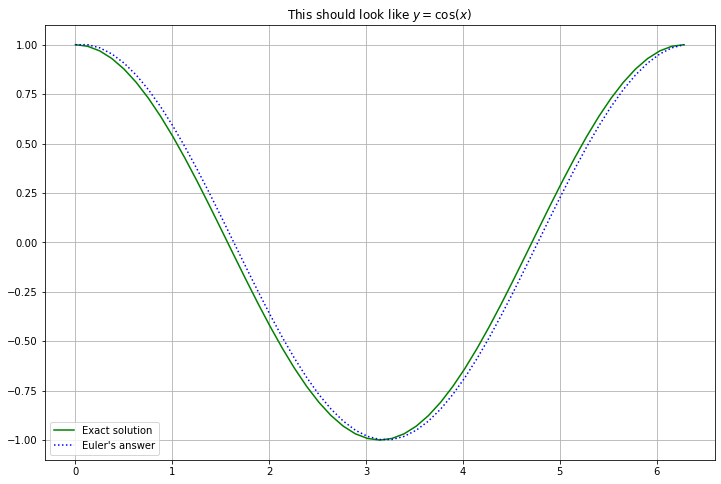

In [5]:
(x, Y) = euler(f_1, a, b, u_0, n=n_steps)  
y = np.cos(x)
figure(figsize=[12,8])
title("This should look like $y = \cos(x)$")
plot(x, y, 'g', label="Exact solution")
plot(x, Y, 'b:', label="Euler's answer")
legend()
grid(True)

### Solving for Example 2: some exponential functions

In [6]:
def f_2(t, u):
    """For solving du/dt = k u.
    The variable k may be defined later, so long as that is done before this function is used.
    """
    return k*u

In [7]:
# You could experiment by changing these values here;
# for now I instead redefine them below.
k = 1
u_0 = 0.8
a = 0
b = 2
n_steps

50

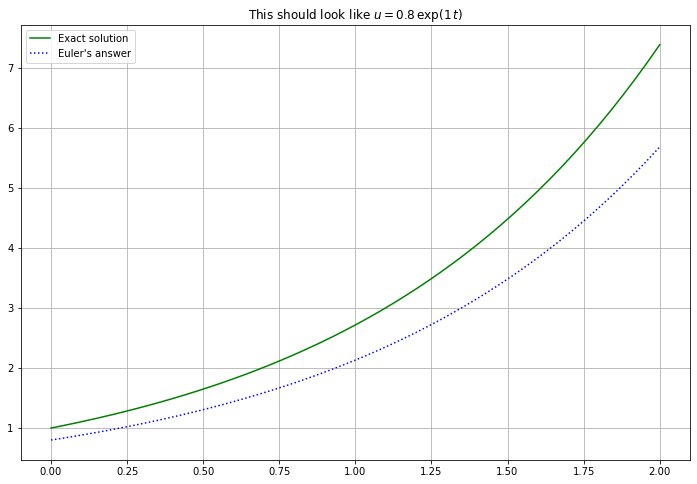

In [8]:
(t, U) = euler(f_2, a, b, u_0, n=n_steps)
figure(figsize=[12,8])
title(f"This should look like $u = {u_0} \, \exp({k} \, t)$")
#u = u_0*np.exp(k*t)
u = np.exp(k*t)
plot(t, u, 'g', label="Exact solution")
plot(t, U, 'b:', label="Euler's answer")
legend()
grid(True)

In [9]:
# You could experiment by changing these values here.
k = -0.5
u_0 = 3
a = 0
b = 2
n_steps = 100

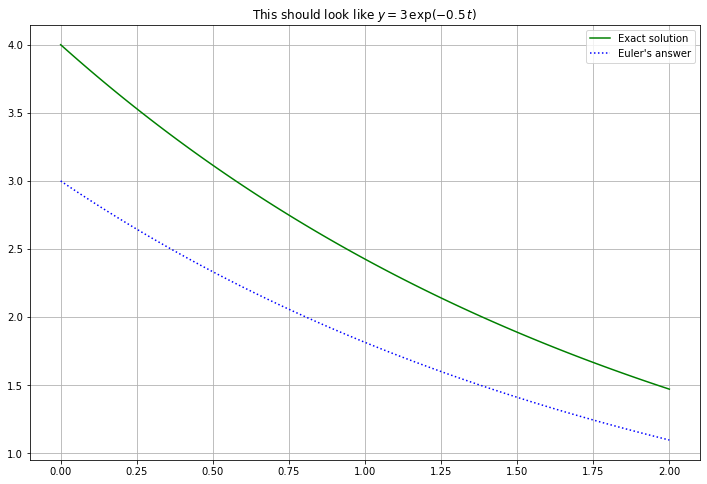

In [10]:
(t, U) = euler(f_2, a, b, u_0, n=n_steps)
figure(figsize=[12,8])
title(f"This should look like $y = {u_0} \, \exp({k} \, t)$")
#u = u_0*np.exp(k*t)
u = 4*np.exp(k*t)
plot(t, u, 'g', label="Exact solution")
plot(t, U, 'b:', label="Euler's answer")
legend()
grid(True)

### Solving for Example 3; solutions that blow up

In [11]:
def f_3(t, u):
    """For solving du/dt = u^2."""
    return u**2

In [12]:
a = 0
b = 0.9
u_0 = 1

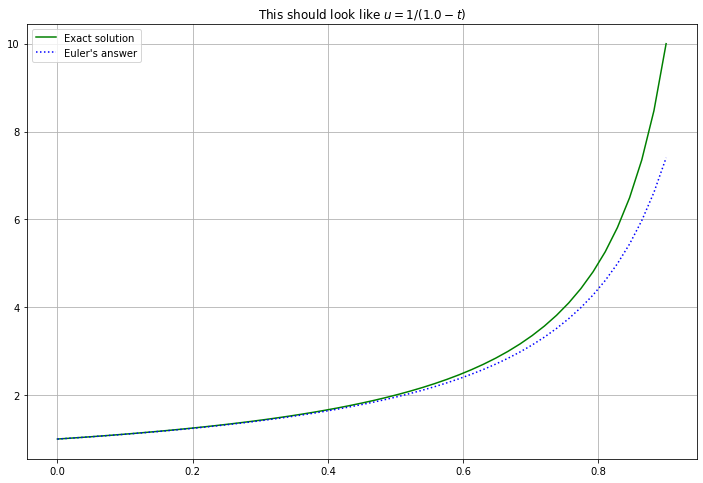

In [13]:
(t, U) = euler(f_3, a, b, u_0, n=50)
u = 1/(a + 1/u_0 - t)
figure(figsize=[12,8])
title(f"This should look like $u = 1/({a + 1/u_0} - t)$")
plot(t, u, 'g', label="Exact solution")
plot(t, U, 'b:', label="Euler's answer")
legend()
grid(True)

There is clearly a problem when $t$ reaches 1; let us explore that:

In [14]:
b = 1.1

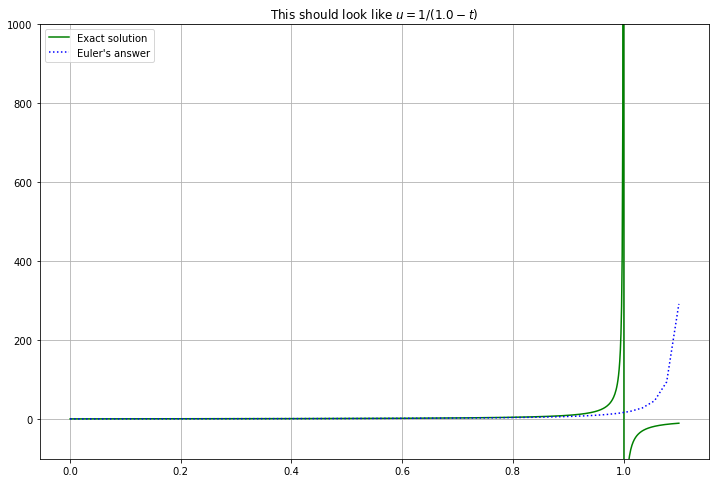

In [15]:
(t, U) = euler(f_3, a, b, u_0, n=50)
T = a + 1/u_0
t1000 = linspace(a, b, 1000)  # More t values are needed to get a good graph near the vertical asymptote
u = 1/(a + 1/u_0 - t1000)

figure(figsize=[12,8])
title(f"This should look like $u = 1/({T} - t)$")
plt.ylim(bottom=-100, top=1000)
# Note: if you are curious about this new function "ylim", uncomment the following:
#help(plt.ylim)
plot(t1000, u, 'g', label="Exact solution")
plot(t, U, 'b:', label="Euler's answer")
legend()
grid(True)

Clearly Euler's method can never produce the vertical asymptote; even less can it get the jump to negative values of $u$.
The best we can do is improve accuracy by using more, smaller time steps:

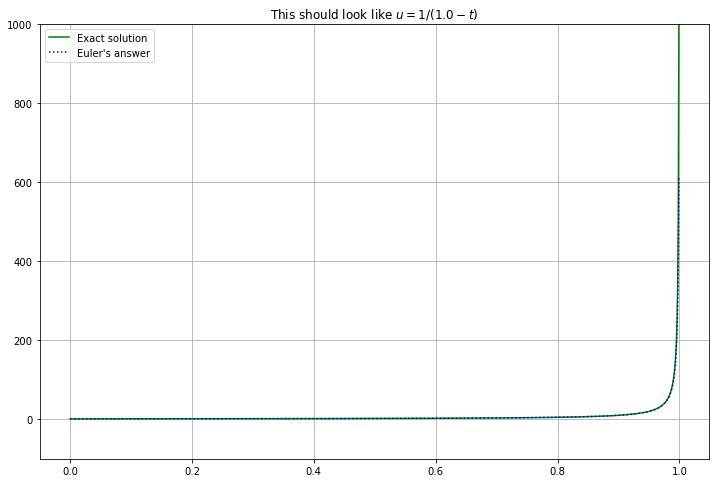

In [16]:
b=0.999
(t, U) = euler(f_3, a, b, u_0=1., n=10000)  # More t values, to improve accuracy
T = a + 1/u_0
t1000 = linspace(a, b, 1000)  # More t values are needed to get a good graph near the vertical asymptote
u = 1/(a + 1/u_0 - t1000)

figure(figsize=[12,8])
title(f"This should look like $u = 1/({T} - t)$")
plt.ylim(bottom=-100, top=1000)
plot(t1000, u, 'g', label="Exact solution")
plot(t, U, 'b:', label="Euler's answer")
legend()
grid(True)

<a name="solving-example-4"></a>
### Solving for Example 4 (Added March 22)

In [17]:
def f_4(t, u):
    """The variable K may be defined later, so long as that is done before this function is used.
    The solution for a=0 is u(t) = u(t; 0, u_0) = \cos t + (u_0 - 1) e^{-K t}
    """
    return -np.sin(t) - K*(u - np.cos(t))

With enough steps (small enough step size $h$), all is well:

In [18]:
a = 0.
b = 2 * np.pi  # One period
u_0 = 2.
K = 40.
n=1000

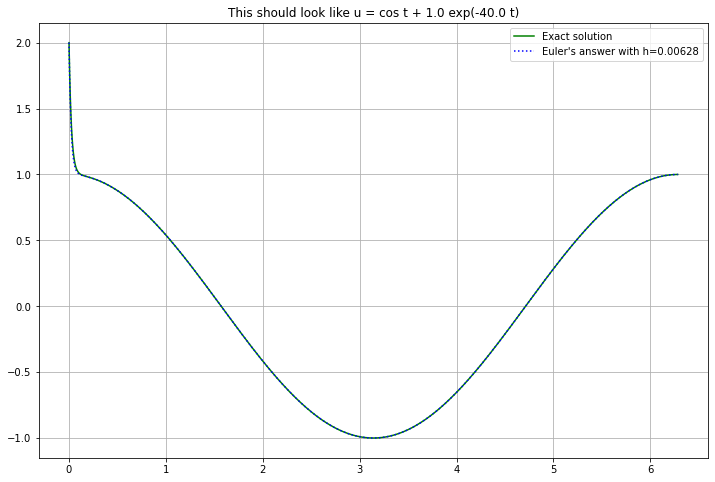

In [19]:
(t, U) = euler(f_4, a, b, u_0, n)
u = np.cos(t) + (u_0 - 1) * np.exp(-K*t) 
figure(figsize=[12,8])
h = (b-a)/n
title(f"This should look like u = cos t + {u_0-1:0.3} exp(-{K} t)")
plot(t, u, 'g', label="Exact solution")
plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
legend()
grid(True)

However, with large steps (still small enough to handle the $\cos t$ part), there is a catastrophic failure, with growing oscillations that, as we will see, are a characteristic feature of *instability*.

In [20]:
n = 100

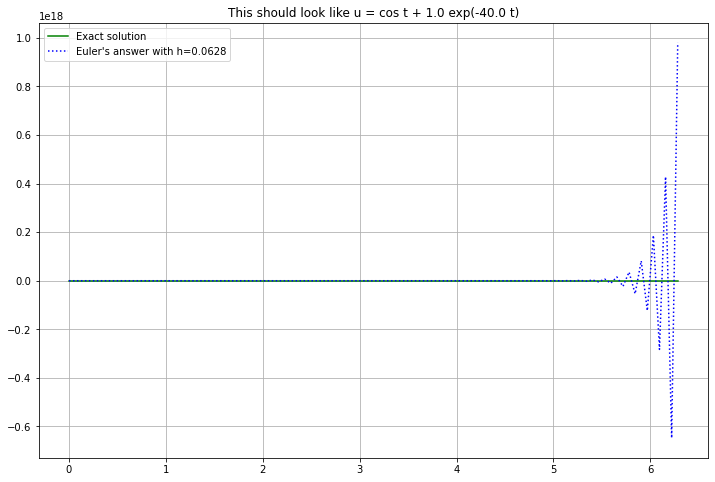

In [21]:
(t, U) = euler(f_4, a, b, u_0, n)
u = np.cos(t) + (u_0 - 1) * np.exp(-K*t) 
figure(figsize=[12,8])
h = (b-a)/n
title(f"This should look like u = cos t + {u_0-1:0.3} exp(-{K} t)")
plot(t, u, 'g', label="Exact solution")
plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
legend()
grid(True)

To show that the $K$ part is the problem, reduce $K$ while leaving the rest unchanged:

In [22]:
K = 1.

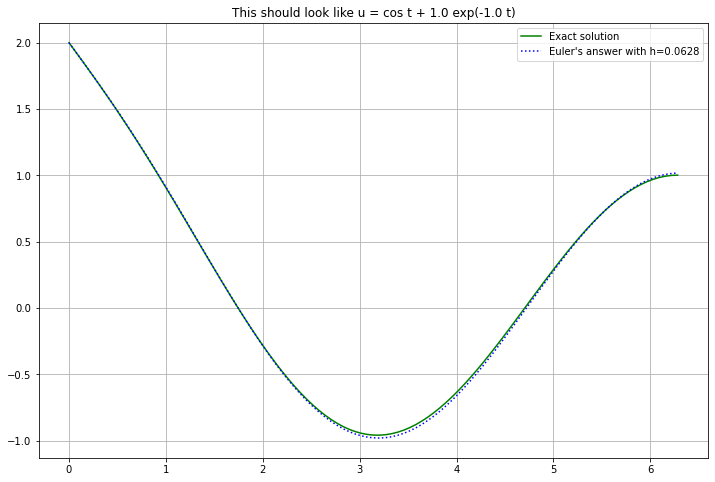

In [23]:
(t, U) = euler(f_4, a, b, u_0, n)
u = np.cos(t) + (u_0 - 1) * np.exp(-K*t) 
figure(figsize=[12,8])
h = (b-a)/n
title(f"This should look like u = cos t + {u_0-1:0.3} exp(-{K} t)")
plot(t, u, 'g', label="Exact solution")
plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
legend()
grid(True)

### Variable Time Step Sizes $h_i$ (just a preview for now)

It is sometime useful to adjust the time step size; for example reducing it when the derivative is larger,
(as happens in Example 3 above).
This gives a slight variant, now expressed in pseudo-code:

Input: $f$, $a$, $b$, $n$ <br>
$t_0 = a$ <br>
$U_0 = u_0$ <br>
for i in $[0, n)$: <br>
$\quad$ Choose $h_i$ somehow <br>
$\quad t_{i+1} = t_i + h_i$ <br>
$\quad U_{i+1} = U_i + h_i f(t_i, U_i)$ <br>
end for

In a later section, we will see how to estimate errors within an algorithm,
and then how to use such error estimates to guide the choice of step size.

### Error Analysis for the Canonical Test Case, $u' = k u$.

A great amount of intuition about numerical methods for solving ODE IVPs comes from that "simplest nontrivial example", number 2 above.
We can solve it with constant step size $h$, and thus study its errors and accuracy.
The recursion relation is now

$$U_{i+1} = U_i + h k U_i = U_i (1 + hk),$$

with solution

$$U_i = u_0 (1 + hk)^i.$$

For comparison, the exact solution of this ODE IVP is

$$
u(t_i) = u_0 e^{k(t_i - a)} = u_0 e^{k ih} = u_0 (e^{kh})^i
$$

So each is a geometric series: the difference is that the *growth factor* is $(1 + hk)$ for Euler's method, and $e^{kh} = 1 + hk + (hk)^2/2 + \cdots = 1 + hk + O(h^2)$ for the ODE.

Ths deviation at each time step is $O(h^2)$, suggesting that by the end $t=b$, at step $n$, the error will be $O(n h^2) = O\left(\displaystyle\frac{b-a}{h} h^2\right) = O(h)$.

This is in fact what happens, but to verify that, we must deal with the challenge that once an error enters at one step, it is potentially amplified at each subsequent step, so the errors introduced at each step do not simply get summed like they did with definite integrals.

### Global Error and Local (Truncation) Error

Ultimately, the error we need to understand is the **global error**: at step $i$,

$$ E_i = u(t_i) - U_i $$

We will approach this by first considering the new error added at each step, the **local truncation error** (or **discretization error**).

At the first step this is the same as above:

$$ e_1 = u(t_1) - U_1 = u(a+h) - U_1 $$

However at later steps we compare the results $U_{i+1}$ to what the solution would be if it were exact at the start of that step: that is, if $U_i$ were exact.

Using the notation $u(t; t_i, U_i)$ introduced <a href="#IVP_notation">above</a> for the solution of the ODE with initial condition $u(t_i) = U_i$, the **location truncation error** at step $i$ is the discrepancy at time $t_{i+1}$ between what Euler's method and the exact solution give when both start at that point $(t_i, U_i)$:

$$ e_i = u(t; t_i, U_i) - U_{i+1} $$

### Error propagation in $u' = k u$, $k \geq 0$.

After one step, $E_1 = u(t_1) - U_1 = e_1$.

At step 2,

$$ E_2 = u(t_2) - U_2 = (u(t_2) - u(t_2, t_1, U_1) + (u(t_2, t_1, U_1) - U_2)
= (u(t_2) - u(t_2, t_1, U_1) + e_2 $$

The first term is the difference at $t=t_2$ of two solutions with values at $t = t_1$ being $u(t_1)$ and $U_1$ respectively. As the ODE is linear and homogeneous, this is the solution of the same ODE with value at $t=t_1$ being $u(t_1) - U_1$, which is $e_1$:
that solution is $e_1 e^{y(t - t_1}$, so at $t=t_2$ it is $e_1 e^{kh}$.
Thus the global error after two steps is

$$ E_2 = e_2 + (e^{kh})e_1: $$

the error from the previous step has been amplified by the growth factor $g = e^{kh}$:

$$ E_2 = e_2 + g e_1: $$

This continues, so that

$$ E_3 = e_3 + g E_1 = e_3 + g (e_2 + g e_1) = e_3 + ge_2 + g^2 e_1 $$

and so on, leading to

$$ E_i = e_i + g e_{i-1} + g^2 e_{i-2} + \cdots + g^{i-1} e_{1} $$.

### Bounding the local truncation errors ...

To get a bound on the global error from the formula above, we first need a bound on the local truncation errors $e_i$.

Taylor's theorem gives $e^{kh} = 1 + kh + e^{k \xi} (kh)^2/2$, $0 < \xi < k h$, so

$$
e_i = U_i e^{kh} - U_i (1 + kh) = U_i (e^{k \xi} h^2/2)
$$

and thus

$$|e_i| \leq |U_i| \frac{e^{kh}}{2} h^2$$

Also, since $1 + kh < e^{kh}$,
$|U_i| < |u(t_i)| = |u_0| e^{k(t_i - a)},$
and we only need this to the beginning of the last step, $i \leq n-1$, for which

$$
|U_i| < |u_0| e^{k(b - h - a)}
$$

Thus

$$
|e_i| \leq \frac{|u_0| e^{k(b - h - a)} e^{kh}}{2} h^2 = \frac{|u_0 e^{k(b - a)}|}{2} h^2
$$

That is,

$$ |e_i| \leq C h^2 \text{ where } C := \frac{|u_0 e^{k(b - a)}|}{2} $$

### ... and using this to complete the bound on the global truncation error

Using this bound on tehlocal errors $e_i$ in the above sum for the global error $E_i$,

$$ | E_i | \leq C h^2 (1 + g + \cdots g^{i-1}) = C \frac{g^i - 1}{g-1} h^2 $$

Since $g^i = e^{k h i} = e^{k (t_i - a)}$ and the denominator $g - 1 = e^{kh} - 1 > k h$,
we get

$$
| E_i | \leq  C \frac{e^{k (t_i - a)} - 1}{k h} h^2
\leq \frac{|u_0 e^{k(b - a)}|}{2} \frac{e^{k (t_i - a)} - 1}{k} h, = O(h)
$$

Note that this global error formula is bulilt from three factors:

- The first is the constant
$\displaystyle \frac{|u_0 e^{k(b - a)}|}{2}$
which is roughly half of the maximum value of the exact solution over the interval $[a, b]$.

- The second
$\displaystyle \frac{e^{k (t_i - a)} - 1}{k}$
depends on $t$, and 

- The third is $h$, showing the overall order of accuracy: first order: the overall absolute error is $O(h)$.

### A more general error bound exists

A very similar result applies to the solution $u(t; a, u_0)$ of the more general initial value problem

$$
\frac{du}{dt} = f(t, u), u(a) = u_0
$$

so long as the function $f$ is "somewhat well-behaved" in that it satidifies a so-called *Lipschitz Condition*:
that there is some constant $K$ such that

$$
\left| \frac{\partial F}{\partial u}(t, u) \right| \leq K 
$$

for the relevant time values $a \leq t \leq b$.

Then this constant $K$ plays the part of the exponential growth factor $k$ above:

$$
| E_i | \leq \frac{|u_0 e^{K(b - a)}|}{2} \frac{e^{K (t_i - a)} - 1}{k} h, = O(h)
$$

**Aside:** As you might have seen in a course on differential equations, such a Lipschitz Condition is necessary to even guarantee that the initial value problem has a unique solution, so it is a quite reasonable requirement.

### There is much room for improvement

As with definite integrals, this is not very impressive, so in the next section on
[Runge-Kutta Methods](ODE-IVP-2-Runge-Kutta.ipynb)
we will explore several widely used methods that improve to second order and then fourth order accuracy.
Later, we will see how to get even higher orders.

But first, we can illustrate how this exponential growth of errors looks in some examples, and coapr the the better behaved errors in definite integrals.

This will be done by looking at the effect of a small change in the initial value, to simulate an error that arises there.

### Error propagation for Example 1, an integration

In [24]:
a = 0
b = 2*np.pi
u_0 = 1  # Original value

In [25]:
(x, u) = euler(f_1, a, b, u_0)  # Use the default of 50 steps; typically enough for a nice graph.

But now "perturb" the initial value in all cases by this much:

In [26]:
delta_u_0 = 0.1

In [27]:
(x, u_perturbed) = euler(f_1, a, b, u_0+delta_u_0)

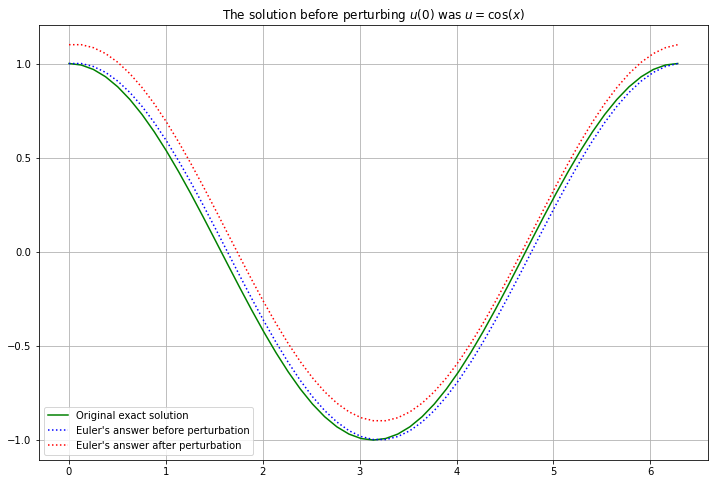

In [28]:
figure(figsize=[12,8])
title("The solution before perturbing $u(0)$ was $u = \cos(x)$")
plot(x, np.cos(x), 'g', label="Original exact solution")
plot(x, u, 'b:', label="Euler's answer before perturbation")
plot(x, u_perturbed, 'r:', label="Euler's answer after perturbation")
legend()
grid(True)

This just shifts all the $u$ values up by the perturbation of $u_0$.

### Error propagation for Example 2

In [29]:
k = 1
a = 0
b = 2
u_0 = 1  # Original value

In [30]:
(t, U) = euler(f_2, a, b, u_0)
(t, U_perturbed) = euler(f_2, a, b, u_0+delta_u_0)

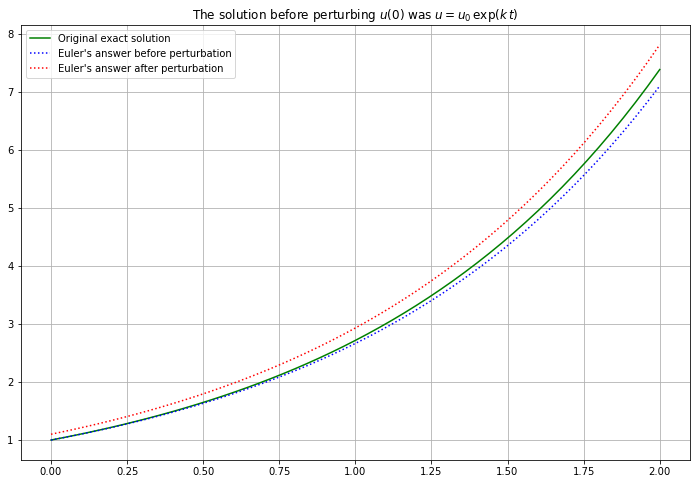

In [31]:
figure(figsize=[12,8])
title("The solution before perturbing $u(0)$ was $u = {u_0} \, \exp({k} \, t)$")
plot(t, u_0*np.exp(k*t), 'g', label="Original exact solution")
plot(t, U, 'b:', label="Euler's answer before perturbation")
plot(t, U_perturbed, 'r:', label="Euler's answer after perturbation")
legend()
grid(True)

Graphing the error shows its exponential growth:

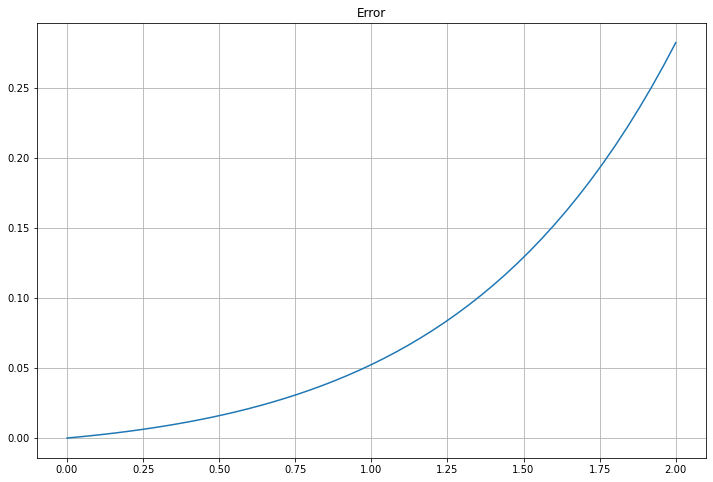

In [32]:
figure(figsize=[12,8])
title("Error")
plot(t, u_0*np.exp(k*t) - U)
grid(True)